# PO-4

Section 2: Structural characterization of phosphorylation sites: analysis of the region, secondary structure and accessibility of the phospho-S/T/Y peptides

* TO-DO Run PfamScan to proteins

## Table of Contents

* [1. Introduction](#introduction)
    * [1.1 Description](#project-description)
    * [1.2 Packages](#packages)
        
 
* [2. Data Loading](#data-loading)
    * [2.1 Loading secondary structure predictions](#loading-wt-and-ko-initial-files)
    * [2.2 Loading Uniprot reference proteome](#loading-uniprot-reference-proteome)
    

* [3. Data Preprocessing](#data-preprocessing)
    * [3.1 Generating Kmers](#generating-kmers)
    * [3.2 Processing peptide files](#processing-peptide-files)


* [4. Data Exploration](#data-exploration)
    * [4.1 Generating Kmers](#generating-kmers)
    * [4.2 Processing peptide files](#processing-peptide-files)


* [5. References](#references)

* [6. Project contribution](#project-contribution)

## 1.1 Description <a class="anchor" id="description"></a>

## 1.2 Packages

In [1]:
import glob, os, sys
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc

sys.path.append('../src/')
from utils import *

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

%load_ext watermark
%watermark -a 'Fernando Pozo' -u -n -t -z -g -p pandas,numpy,matplotlib

!pwd

Fernando Pozo 
last updated: Fri Sep 11 2020 11:52:37 CEST 

pandas 1.0.4
numpy 1.18.5
matplotlib 3.2.1
Git hash: cefe14675e7c07123ef09f36d71551826a082e93
/local/fpozoc/projects/dev/ph-proteomics/notebooks


In [2]:
df_ss_pred = pd.concat([parse_ss_features(file) for file in glob.glob('/local/fpozoc/projects/dev/ph-proteomics/data/external/secondary_structure_predictions/*/*.csv')]).reset_index(drop=True)

In [9]:
list_manual_pred_ids = ['Q8IZP0', 'P15056', 'O75362', 'Q9NQ86', 'Q9BSQ5', 'Q04726', 'Q9Y6Y8']
df_ss_pred.loc[df_ss_pred.id.str.contains('|'.join(list_manual_pred_ids)), 'proteinName'] = df_ss_pred['id'].str.split('_').str[1]
df_ss_pred.loc[~df_ss_pred.id.str.contains('|'.join(list_manual_pred_ids)), 'proteinName'] = df_ss_pred['id'].str.split('|').str[1]

In [10]:
df_ss_pred

## solo seleccionar el residuo vs el resto de la proteína

,id,seq,len,rsa,ss3,p_ss3,ss8,p_ss8,dis,proteinName
0,sp|Q15717|ELAV1_HUMAN,MSNGYEDHMAEDCRGDIGRTNLIVNYLPQNMTQDELRSLFSSIGEV...,326,9998777766764656455220102301581447404620571261...,CCCCCCCCCCCCCCCCCCCCEEEEECCCCCCCHHHHHHHHCCCCCE...,9999999999999999998699999899999999999998576999...,CCCCCCCCCCCCCCCCCCCCEEEEESCCTTCCHHHHHHHHTTTSCE...,0000000000000110231499999610992099999997585519...,9999999999999875521000000000000000000000000000...,Q15717
1,sp|Q86XN7|PRSR1_HUMAN,MDKKSFEMVLDEIRKAVLTEYKLKAIEYVHGYFSSEQVVDLLRYFS...,944,5776315411540462224742141035243302152004004314...,CCHHHHHHHHHHHHHHCCCHHHHHHHHHCCCCCCHHHHHHHHHCCC...,9966899999999997699999999999589967999999996599...,CCHHHHHHHHHHHHHHHCCHHHHHHHHHHTTCCCHHHHHHHHTTSC...,0066799999999997332999999998445332999999994443...,7321000000000000000000000000000000000000000000...,Q86XN7
2,sp|Q9NYL2|M3K20_HUMAN,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,800,8885555325152841644553466841101203137584400012...,CCCCCCCCEECCHHHEEEEEEEEECCCEEEEEEEECCCCEEEEEEE...,9999998678559996999999986998999999999998999999...,CCCCCCCCEECCGGGEEEEEEEEECTTEEEEEEEETTTTEEEEEEE...,0001211488559996999999983568999999998788999999...,9864321000000000000000000000000000000000000000...,Q9NYL2
3,sp|Q9NZ09|UBAP1_HUMAN,MASKKLGADFHGTFSYLDDVPFKTGDKFKTPAKVGLPIGFSLPDCL...,502,9998877787877656569576764985754885655885746856...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,9999999999999999999999999999999999999999999999...,CCCCCCCCCCCCCCCCCCCCCCCCCCTCCCCCCCCCCCCCCCCCCC...,0000000000011002332100000341100110000231011101...,9999999999987765665536664333223477574666554456...,Q9NZ09
4,sp|Q8N9B5|JMY_HUMAN,MSFALEETLESDWVAVRPHVFDEREKHKFVFIVAWNEIEGKFAITC...,988,8966467437553122446347675534110000125364421121...,CCCCCCCCCCCCEEEECCCCCCCCCCEEEEEEEEEECCCCEEEEEE...,9999766667896988679889997756999999968788799997...,CCCCCCCCCCTCEEEECTTCCCCCCCEEEEEEEEEETTTTEEEEEE...,0000122222336988435222322266999999973364799997...,9865332222110000001111111000000000000000000000...,Q8N9B5
...,...,...,...,...,...,...,...,...,...,...
3497,sp|P51826|AFF3_HUMAN,MDSFDLALLQEWDLESLCVYEPDRNALRRKERERRNQETQQDDGTF...,1226,8886755557657576544555645545564566566657777665...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,9999999999999999999998888887777777887888999999...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0000001111000000001103211112333333323222111100...,9999888888788888777887788887778878776778788898...,P51826
3498,sp|Q92619|HMHA1_HUMAN,MFSRKKRELMKTPSISKKNRAGSPSPQPSGELPRKDGADAVFPGPS...,1136,8777777766767767888777777778888677888787778888...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,9999999999999999999999999999999999999999999999...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0000000000000000000000000000000000000000000000...,9999999999999999999999999999999999999999999999...,Q92619
3499,sp|Q99569|PKP4_HUMAN,MPAPEQASLVEEGQPQTRQEAASTGPGMEPETTATTILASVKEQEL...,1192,9988988888899888888888888887877764664465466555...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,9999999999999999999999999999999999999999999999...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0000000000000000000000000000000000000000000000...,9999999999999999999999999999999999999999999999...,Q99569
3500,sp|Q68DQ2|CRBG3_HUMAN,MSSGRRRGSAPWHSFSRFFAPRSPSRDKEEEEEERPGTSPPPAPGR...,2970,9998888896766666665578788788888899899988888898...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,9999999999999999999999999999999999999999999999...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0000000000000000000000000000000000000000000000...,9999999999999999999999999999999999999999999999...,Q68DQ2


In [11]:
df_exptypes = pd.read_csv('../data/interim/preprocessed_peptides.tsv.gz', compression='gzip', sep='\t')

In [33]:
df = pd.merge(df_exptypes, df_ss_pred, how='left', on='proteinName')
df[['proteinName', 'geneName', 'proteinSeq']].drop_duplicates().to_csv('../data/processed/proteins_ss.tsv.gz', sep='\t', compression='gzip', index=None)

In [15]:
# peptide RSPTPER of TTN discarded

In [16]:
df = calculate_structure_stats(df)
df.to_csv('../data/interim/secondary_structure_analysis.tsv.gz', index=None, compression='gzip', sep='\t')

In [17]:
df_wt = pd.merge(df_exptypes.loc[df_exptypes.type=='wt'], df_ss_pred, how='left', on='proteinName')
df_wt = calculate_structure_stats(df_wt)

df_ko = pd.merge(df_exptypes.loc[df_exptypes.type=='ko'], df_ss_pred, how='left', on='proteinName')
df_ko = calculate_structure_stats(df_ko)

In [18]:
rsa = {
    'WT ph. res.':
    {
    'Exposed': (df_wt.ph_rsa.sum()/df_wt.ph_rsa.shape[0])*100,
    'Buried': 100-((df_wt.ph_rsa.sum()/df_wt.ph_rsa.shape[0])*100),
     },
    'KO ph. res.':
    {
    'Exposed': (df_ko.ph_rsa.sum()/df_ko.ph_rsa.shape[0])*100,
    'Buried': 100-((df_ko.ph_rsa.sum()/df_ko.ph_rsa.shape[0])*100),
     },
    'WT background':
    {
    'Exposed': (df_wt.nph_rsa.sum()/df_wt.nph_rsa.shape[0])*100,
    'Buried': 100-((df_wt.nph_rsa.sum()/df_wt.nph_rsa.shape[0])*100),
     },
    'KO background':
    {
    'Exposed': (df_ko.nph_rsa.sum()/df_ko.nph_rsa.shape[0])*100,
    'Buried': 100-((df_ko.nph_rsa.sum()/df_ko.nph_rsa.shape[0])*100),
     },
}
df_rsa = pd.DataFrame(rsa).T

disorder = {
    'WT ph. res.':
    {
    'Disordered': (df_wt.ph_dis.sum()/df_wt.ph_dis.shape[0])*100,
    'Ordered': 100-((df_wt.ph_dis.sum()/df_wt.ph_dis.shape[0])*100),
     },
    'KO ph. res.':
    {
    'Disordered': (df_ko.ph_dis.sum()/df_ko.ph_dis.shape[0])*100,
    'Ordered': 100-((df_ko.ph_dis.sum()/df_ko.ph_dis.shape[0])*100),
     },
    'WT background':
    {
    'Disordered': (df_wt.nph_dis.sum()/df_wt.nph_dis.shape[0])*100,
    'Ordered': 100-((df_wt.nph_dis.sum()/df_wt.nph_dis.shape[0])*100),
     },
    'KO background':
    {
    'Disordered': (df_ko.nph_dis.sum()/df_ko.nph_dis.shape[0])*100,
    'Ordered': 100-((df_ko.nph_dis.sum()/df_ko.nph_dis.shape[0])*100),
     },
}
df_dis = pd.DataFrame(disorder).T

ss3 = {
    'WT ph. res.':
    {
    'Loop': (df_wt.ph_ss3_C.sum()/(df_wt.ph_ss3_C.sum()+df_wt.ph_ss3_E.sum()+df_wt.ph_ss3_H.sum()))*100,
    'Helix': (df_wt.ph_ss3_H.sum()/(df_wt.ph_ss3_C.sum()+df_wt.ph_ss3_E.sum()+df_wt.ph_ss3_H.sum()))*100,
    'Beta-Sheet': (df_wt.ph_ss3_E.sum()/(df_wt.ph_ss3_C.sum()+df_wt.ph_ss3_E.sum()+df_wt.ph_ss3_H.sum()))*100,
     },
    'KO ph. res.':
    {
    'Loop': (df_ko.ph_ss3_C.sum()/(df_ko.ph_ss3_C.sum()+df_ko.ph_ss3_E.sum()+df_ko.ph_ss3_H.sum()))*100,
    'Helix': (df_ko.ph_ss3_H.sum()/(df_ko.ph_ss3_C.sum()+df_ko.ph_ss3_E.sum()+df_ko.ph_ss3_H.sum()))*100,
    'Beta-Sheet': (df_ko.ph_ss3_E.sum()/(df_ko.ph_ss3_C.sum()+df_ko.ph_ss3_E.sum()+df_ko.ph_ss3_H.sum()))*100,
     },
    'WT background':
    {
    'Loop': (df_wt.nph_ss3_C.sum()/(df_wt.nph_ss3_C.sum()+df_wt.nph_ss3_E.sum()+df_wt.nph_ss3_H.sum()))*100,
    'Helix': (df_wt.nph_ss3_H.sum()/(df_wt.nph_ss3_C.sum()+df_wt.nph_ss3_E.sum()+df_wt.nph_ss3_H.sum()))*100,
    'Beta-Sheet': (df_wt.nph_ss3_E.sum()/(df_wt.nph_ss3_C.sum()+df_wt.nph_ss3_E.sum()+df_wt.nph_ss3_H.sum()))*100,
     },
    'KO background':
    {
    'Loop': (df_ko.nph_ss3_C.sum()/(df_ko.nph_ss3_C.sum()+df_ko.nph_ss3_E.sum()+df_ko.nph_ss3_H.sum()))*100,
    'Helix': (df_ko.nph_ss3_H.sum()/(df_ko.nph_ss3_C.sum()+df_ko.nph_ss3_E.sum()+df_ko.nph_ss3_H.sum()))*100,
    'Beta-Sheet': (df_ko.nph_ss3_E.sum()/(df_ko.nph_ss3_C.sum()+df_ko.nph_ss3_E.sum()+df_ko.nph_ss3_H.sum()))*100,
     }, 
}
df_ss3 = pd.DataFrame(ss3).T

In [29]:
df_rsa.round(1)

,Exposed,Buried
WT ph. res.,66.5,33.5
KO ph. res.,66.2,33.8
WT background,45.8,54.2
KO background,47.4,52.6


In [30]:
df_dis.round(1)

,Disordered,Ordered
WT ph. res.,73.7,26.3
KO ph. res.,75.0,25.0
WT background,39.2,60.8
KO background,41.2,58.8


In [31]:
df_ss3.round(1)

,Loop,Helix,Beta-Sheet
WT ph. res.,96.9,2.3,0.9
KO ph. res.,96.8,2.5,0.8
WT background,65.7,25.0,9.4
KO background,67.0,24.2,8.8


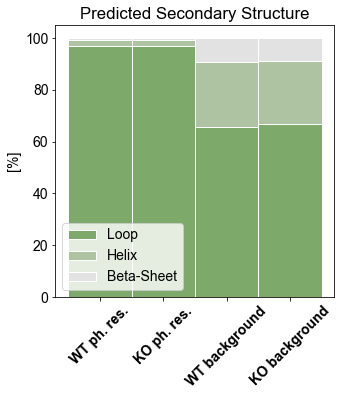

In [22]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}

rc('font', **font)

df = df_ss3
color1 = '#7da96a'
color2 = '#adc3a2'
color3 = '#e2e2e2'

bars1 = df['Loop'].values
bars2 = df['Helix'].values
bars3 = df['Beta-Sheet'].values
bars = np.add(bars1, bars2).tolist()

names = df.T.columns
r = [0,1,2,3]
barWidth = 1

plt.figure(figsize=(5,5)) 
plt.bar(r, bars1, color=color1, edgecolor='white', width=barWidth)
plt.bar(r, bars2, bottom=bars1, color=color2, edgecolor='white', width=barWidth)
plt.bar(r, bars3, bottom=bars, color=color3, edgecolor='white', width=barWidth)

plt.xticks(r, names, fontweight='bold', rotation=45)
plt.ylabel("[%]")
plt.legend(df.columns)
plt.title('Predicted Secondary Structure')
plt.savefig('../reports/figures/figure2A.png', bbox_inches='tight', dpi=360)

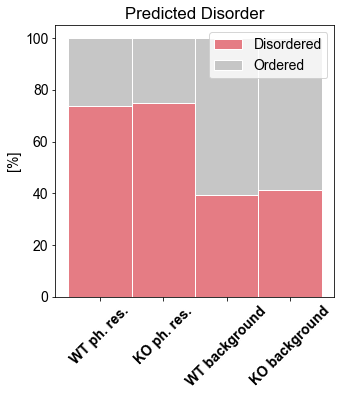

In [23]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}

rc('font', **font)

df = df_dis
color1 = '#e57c84'
color2 = '#c6c6c6'

bars1 = df['Disordered'].values
bars2 = df['Ordered'].values

names = df.T.columns
r = [0,1,2,3]
barWidth = 1

plt.figure(figsize=(5,5)) 
plt.bar(r, bars1, color=color1, edgecolor='white', width=barWidth)
plt.bar(r, bars2, bottom=bars1, color=color2, edgecolor='white', width=barWidth)
plt.xticks(r, names, fontweight='bold', rotation=45)
plt.ylabel("[%]")
plt.legend(df.columns)
plt.title('Predicted Disorder')
plt.savefig('../reports/figures/figure2B.png', bbox_inches='tight', dpi=360)

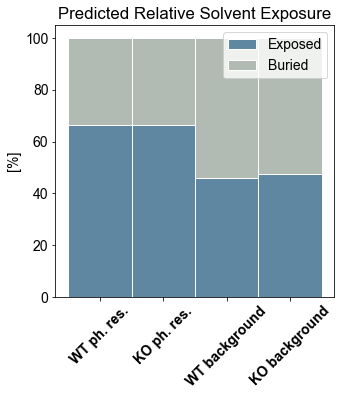

In [24]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}

rc('font', **font)

df = df_rsa
color1 = '#6087a1'
color2 = '#b1bab3'

bars1 = df['Exposed'].values
bars2 = df['Buried'].values

names = df.T.columns
r = [0,1,2,3]
barWidth = 1

plt.figure(figsize=(5,5)) 
plt.bar(r, bars1, color=color1, edgecolor='white', width=barWidth)
plt.bar(r, bars2, bottom=bars1, color=color2, edgecolor='white', width=barWidth)
plt.xticks(r, names, fontweight='bold', rotation=45)
plt.ylabel("[%]")
plt.legend(df.columns)
plt.title('Predicted Relative Solvent Exposure')
plt.savefig('../reports/figures/figure2C.png', bbox_inches='tight', dpi=360)

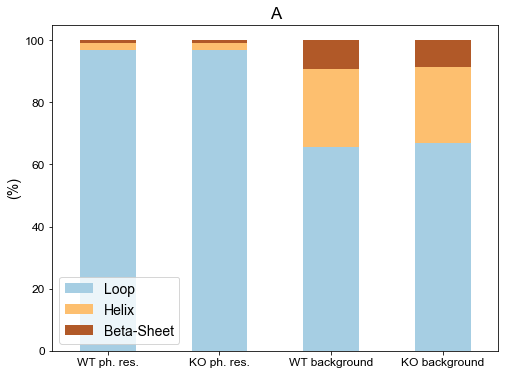

In [25]:
plot_stacked_data(df_ss3, title='A', cmp='Paired')

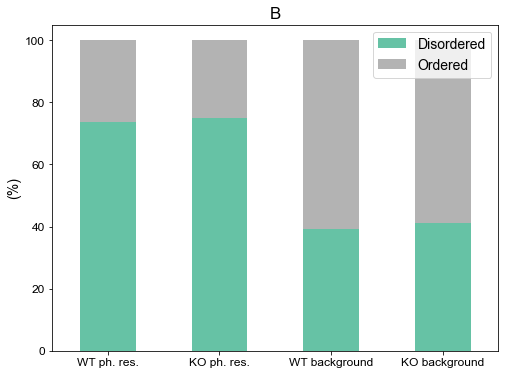

In [26]:
plot_stacked_data(df_dis, title='B', cmp='Set2')

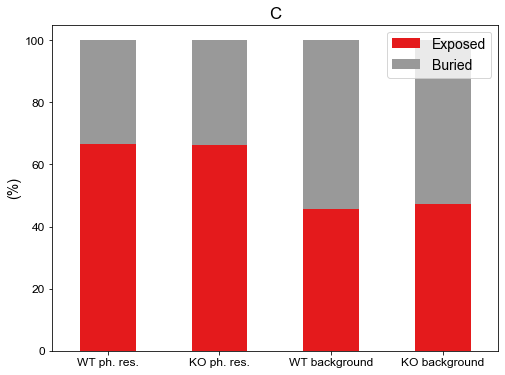

In [27]:
plot_stacked_data(df_rsa, title='C', cmp='Set1')

In [28]:
# old format
# df = pd.merge(df_exptypes, df_ss_pred, how='left', on='proteinName')
# df = df[~df['ss3'].isnull()]
# df['kmer_rsa'] = [str(rsa)[ploc-6:ploc+7] for ploc, rsa  in zip(df['proteinSeq-loc'], df['rsa'])]
# df['kmer_rsa_n'] = [round(sum(list(map(int, rsa)))/117, 2) for rsa in df['kmer_rsa'].str.split('').str[1:-1]]
# df['no_kmer_rsa'] = [str(rsa)[:ploc-6] + str(rsa)[ploc+7:] for ploc, rsa in zip(df['proteinSeq-loc'], df['rsa'])]
# df['no_kmer_rsa_n'] = [round(sum(list(map(int, rsa)))/len(rsa), 2) for rsa in df['no_kmer_rsa'].str.split('').str[1:-1]]

# df['kmer_ss3'] = [str(ss3)[ploc-6:ploc+7] for ploc, ss3 in zip(df['proteinSeq-loc'], df['ss3'])]
# df['no_kmer_ss3'] = [str(ss3)[:ploc-6] + str(ss3)[ploc+7:] for ploc, ss3 in zip(df['proteinSeq-loc'], df['ss3'])]
# df['kmer_p_ss3'] = [str(p_ss3)[ploc-6:ploc+7] for ploc, p_ss3  in zip(df['proteinSeq-loc'], df['p_ss3'])]
# df['ptm_ss3'] = [str(ss3)[ploc:ploc+1] + '(' + str(p_ss3)[ploc:ploc+1] + ')' for ploc, ss3, p_ss3  in zip(df['proteinSeq-loc'], df['ss3'], df['p_ss3'])]
# df['kmer_p_ss3_n'] = [round(sum(list(map(int, pss3)))/117, 2) for pss3 in df['kmer_p_ss3'].str.split('').str[1:-1]]
# df['kmer_ss3_len'] = df['kmer_ss3'].str.len()
# df['no_kmer_ss3_len'] = df['no_kmer_ss3'].str.len()
# df['kmer_ss3_C'] = df['kmer_ss3'].str.count('C')
# df['no_kmer_ss3_C'] = df['no_kmer_ss3'].str.count('C')
# df['kmer_ss3_E'] = df['kmer_ss3'].str.count('E')
# df['no_kmer_ss3_E'] = df['no_kmer_ss3'].str.count('E')
# df['kmer_ss3_H'] = df['kmer_ss3'].str.count('H')
# df['no_kmer_ss3_H'] = df['no_kmer_ss3'].str.count('H')

# df['kmer_ss8'] = [str(ss8)[ploc-6:ploc+7] for ploc, ss8  in zip(df['proteinSeq-loc'], df['ss8'])]
# df['kmer_p_ss8'] = [str(p_ss8)[ploc-6:ploc+7] for ploc, p_ss8  in zip(df['proteinSeq-loc'], df['p_ss8'])] 
# df['ptm_ss8'] = [str(ss8)[ploc:ploc+1] + '(' + str(p_ss8)[ploc:ploc+1] + ')' for ploc, ss8, p_ss8  in zip(df['proteinSeq-loc'], df['ss8'], df['p_ss8'])]
# df['kmer_p_ss8_n'] = [round(sum(list(map(int, pss8)))/117, 2) for pss8 in df['kmer_p_ss8'].str.split('').str[1:-1]]

# df['kmer_dis'] = [str(dis)[ploc-6:ploc+7] for ploc, dis  in zip(df['proteinSeq-loc'], df['dis'])]
# df['ptm_dis'] = [str(dis)[ploc:ploc+1] for ploc, dis in zip(df['proteinSeq-loc'], df['dis'])]
# df['no_kmer_dis'] = [str(dis)[:ploc-6] + str(dis)[ploc+7:] for ploc, dis in zip(df['proteinSeq-loc'], df['dis'])]
# df['kmer_dis_n'] = [round(sum(list(map(int, dis)))/117, 2) for dis in df['kmer_dis'].str.split('').str[1:-1]]
# df['no_kmer_dis_n'] = [round(sum(list(map(int, dis)))/len(dis), 2) for dis in df['no_kmer_dis'].str.split('').str[1:-1]]

**Author information**:
Fernando Pozo ([@fpozoc](https://gitlab.com/fpozoc))

You can find the data driven project jupyter notebook template [here](https://gitlab.com/fpozoc/data-driven-project-template/-/blob/master/notebooks/1.0-nb_template.ipynb).